<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo 9.5: Working with Text
- Using [NLTK](http://www.nltk.org) (Natural Language Toolkit)
- Using [spaCy](https://spacy.io)

INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## Import libraries

In [16]:
!pip install regex

     |████████████████████████████████| 706kB 3.2MB/s eta 0:00:01
  Created wheel for regex: filename=regex-2020.5.14-cp37-cp37m-macosx_10_9_x86_64.whl size=287294 sha256=55e3d03b4da96b0af180bdb3d7bbfce2ca55f3a77fc20854d09d989e815d4cc3
  Stored in directory: /Users/allenj/Library/Caches/pip/wheels/ee/3a/5c/1f0ce151d6ddeee56e03e933603e21b5b8dcc727989fde82f5
Successfully built regex


In [18]:
!pip install spacy

     |████████████████████████████████| 10.5MB 6.1MB/s eta 0:00:01
     |████████████████████████████████| 184kB 6.7MB/s eta 0:00:01
     |████████████████████████████████| 4.0MB 7.2MB/s eta 0:00:01
     |████████████████████████████████| 61kB 7.5MB/s eta 0:00:01
     |████████████████████████████████| 71kB 7.1MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 6.7MB/s eta 0:00:01
     |████████████████████████████████| 215kB 6.1MB/s eta 0:00:01
  Found existing installation: tqdm 4.36.1
    Uninstalling tqdm-4.36.1:
      Successfully uninstalled tqdm-4.36.1


In [19]:
## Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

import regex as re
import nltk
import spacy

In [23]:
!python -m spacy download en

     |████████████████████████████████| 12.0MB 5.9MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-cp37-none-any.whl size=12011740 sha256=605416eb1f25470b73899a05288f5233282ed382ffe8dcf4b1df4c2e2ba3b2ef
  Stored in directory: /private/var/folders/4q/tqryw4zj44q9h17_g75tjg140000gn/T/pip-ephem-wheel-cache-siht9z87/wheels/6a/47/fb/6b5a0b8906d8e8779246c67d4658fd8a544d4a03a75520197a
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/Users/allenj/opt/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/allenj/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/allenj/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [46]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/allenj/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Load data

In [2]:
## Loading the data

input_file = '../../data/ncc-1701-D.txt'

with open(input_file, 'r') as f:
    text = f.read()

## Inspect the data

In [8]:
print(text[:1000])

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

In [11]:
print(text)

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

## Work the data
- if necessary or desired
    - remove text or content, e.g. quotes (") or metadata (===)
    - add content or markers, e.g. (#FLAG, --NAME--)
    - remove or convert special symbols, e.g. "é" to "e"
    - remove or convert emoticons

In [0]:
# ANSWER

## Helper method

In [12]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    plt.show()

## spaCy model invocation and text processing
spaCy does the processing of the text as part of the reading of the data.

In [24]:
# load spaCy and the English model
nlp = spacy.load('en')

# process the text
doc = nlp(text)

In [25]:
doc

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

## Tokenise
### NLTK

In [28]:
# use nltk to find tokens
tokens = nltk.word_tokenize(text)

for i, t in enumerate(tokens[:25]):
    print('%2d| %r' % (i+1, t))

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701-D'
 5| ')'
 6| "''"
 7| 'For'
 8| 'five'
 9| 'hundred'
10| 'years'
11| ','
12| 'every'
13| 'ship'
14| 'that'
15| 'has'
16| 'borne'
17| 'the'
18| 'name'
19| 'of'
20| 'the'
21| 'Enterprise'
22| 'has'
23| 'become'
24| 'a'
25| 'legend'


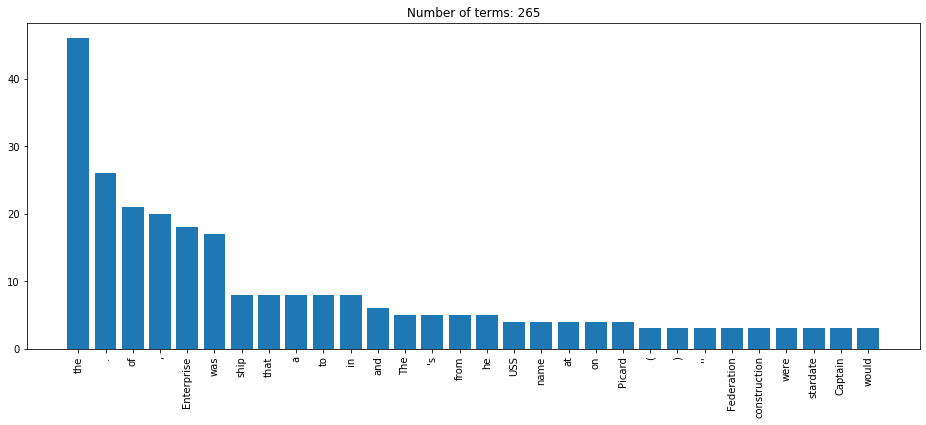

In [29]:
plot_words(tokens)

### spaCy

In [30]:
# only show the results
# spaCy has done it already
for i, t in enumerate(doc):
    print('%2d| %r' % (i+1, t.text))
    if t.text == '.':
        break

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701-D'
 5| ')'
 6| '\n\n'
 7| '"'
 8| 'For'
 9| 'five'
10| 'hundred'
11| 'years'
12| ','
13| 'every'
14| 'ship'
15| 'that'
16| 'has'
17| 'borne'
18| 'the'
19| 'name'
20| 'of'
21| 'the'
22| 'Enterprise'
23| 'has'
24| 'become'
25| 'a'
26| 'legend'
27| '.'


In [0]:
# ANSWER

## Stop Words

In [33]:
stopWords = nltk.corpus.stopwords.words('english')

stopWords.sort()
print(', '.join(stopWords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, her, here, hers, herself, him, himself, his, how, i, if, in, into, is, isn, isn't, it, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, this, those, through, to, too, under, until, up, ve, very, was, wasn, wasn't, we, were, weren, weren't, what, when, where, which, while, who, whom, why, w

In [39]:
# ANSWER
# NOTE: see the `.lower()` method applied to token
tokens_no_stop = [word for word in tokens if not word in stopWords] # create a list of tokens withOUT the stop words 

In [40]:
## NLTK
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
while i < len(tokens):
    # same word
    if tokens[i] == tokens_no_stop[j]:
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1
    # not the same word
    else:
        print('%2d| %-15r' % (i+1, tokens[i]))

    # next word
    i += 1
    # break after the first sentence
    if tokens[i-1] == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| '('             '('
 4| 'NCC-1701-D'    'NCC-1701-D'
 5| ')'             ')'
 6| "''"            "''"
 7| 'For'           'For'
 8| 'five'          'five'
 9| 'hundred'       'hundred'
10| 'years'         'years'
11| ','             ','
12| 'every'         'every'
13| 'ship'          'ship'
14| 'that'         
15| 'has'          
16| 'borne'         'borne'
17| 'the'          
18| 'name'          'name'
19| 'of'           
20| 'the'          
21| 'Enterprise'    'Enterprise'
22| 'has'          
23| 'become'        'become'
24| 'a'            
25| 'legend'        'legend'
26| '.'             '.'


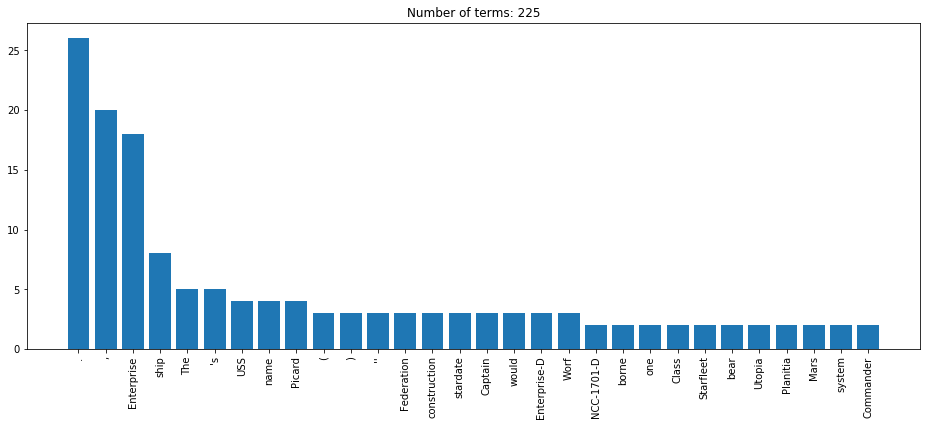

In [41]:
# Create plot of words without stopword
# ANSWER
plot_words(tokens_no_stop)

In [42]:
## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
    if t.text == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| '('             '('
 4| 'NCC-1701-D'    'NCC-1701-D'
 5| ')'             ')'
 6| '\n\n'          '\n\n'
 7| '"'             '"'
 8| 'For'           ''
 9| 'five'          ''
10| 'hundred'       ''
11| 'years'         'years'
12| ','             ','
13| 'every'         ''
14| 'ship'          'ship'
15| 'that'          ''
16| 'has'           ''
17| 'borne'         'borne'
18| 'the'           ''
19| 'name'          ''
20| 'of'            ''
21| 'the'           ''
22| 'Enterprise'    'Enterprise'
23| 'has'           ''
24| 'become'        ''
25| 'a'             ''
26| 'legend'        'legend'
27| '.'             '.'


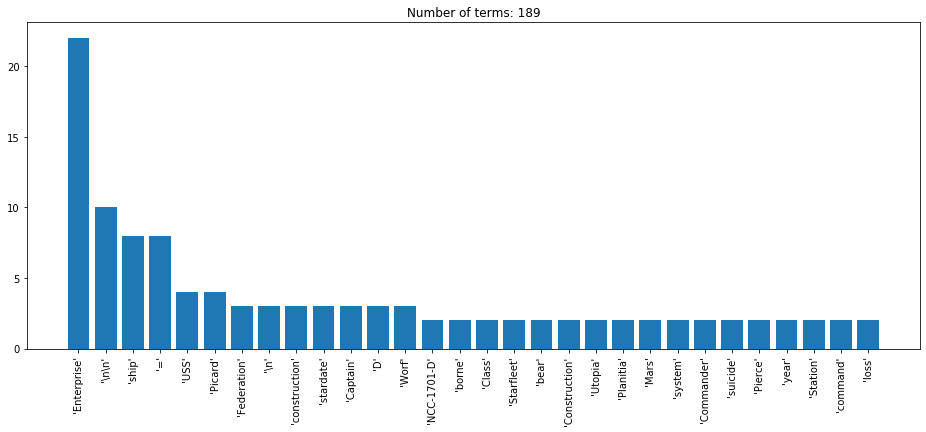

In [43]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)])

## Check Part of Speech

In [44]:
# define PoS
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [48]:
## nltk
tagged = nltk.pos_tag(tokens)

for i, t in enumerate(tagged[:30]):
    print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-')))

 1|'USS'        : NNP  proper noun, singular "Harrison"
 2|'Enterprise' : NNP  proper noun, singular "Harrison"
 3|'('          : (    -
 4|'NCC-1701-D' : NNP  proper noun, singular "Harrison"
 5|')'          : )    -
 6|"''"         : ''   -
 7|'For'        : IN   preposition/subordinating conjunction
 8|'five'       : CD   cardinal digit
 9|'hundred'    : CD   cardinal digit
10|'years'      : NNS  noun plural "desks"
11|','          : ,    -
12|'every'      : DT   determiner
13|'ship'       : NN   noun, singular "desk"
14|'that'       : WDT  wh-determiner which
15|'has'        : VBZ  verb, 3rd person sing. present takes
16|'borne'      : VBN  verb, past participle taken
17|'the'        : DT   determiner
18|'name'       : NN   noun, singular "desk"
19|'of'         : IN   preposition/subordinating conjunction
20|'the'        : DT   determiner
21|'Enterprise' : NNP  proper noun, singular "Harrison"
22|'has'        : VBZ  verb, 3rd person sing. present takes
23|'become'     : VBN  verb, 

In [49]:
## spaCy
for i, t in enumerate(doc):
    print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    if t.text == '.':
        break

 1|'USS'        : PROPN NNP
 2|'Enterprise' : PROPN NNP
 3|'('          : PUNCT -LRB-
 4|'NCC-1701-D' : PROPN NNP
 5|')'          : PUNCT -RRB-
 6|'\n\n'       : SPACE _SP
 7|'"'          : PUNCT ``
 8|'For'        : ADP   IN
 9|'five'       : NUM   CD
10|'hundred'    : NUM   CD
11|'years'      : NOUN  NNS
12|','          : PUNCT ,
13|'every'      : DET   DT
14|'ship'       : NOUN  NN
15|'that'       : DET   WDT
16|'has'        : AUX   VBZ
17|'borne'      : VERB  VBN
18|'the'        : DET   DT
19|'name'       : NOUN  NN
20|'of'         : ADP   IN
21|'the'        : DET   DT
22|'Enterprise' : NOUN  NN
23|'has'        : AUX   VBZ
24|'become'     : VERB  VBN
25|'a'          : DET   DT
26|'legend'     : NOUN  NN
27|'.'          : PUNCT .


## Stemming

In [51]:
## nltk
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in text.split()])

## Lemmatisation

In [53]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/allenj/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [54]:
## nltk
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in text.split()])

In [55]:
## nltk
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()

print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

i | Stem           Lemma
--| -------------- ------------
 1| 'uss'          'USS'       
 2| 'enterpris'    'Enterprise'
 3| '(ncc-1701-d)'   '(NCC-1701-D)'
 4| '"for'         '"For'      
 5| 'five'         'five'      
 6| 'hundr'        'hundred'   
 7| 'years,'       'years,'    
 8| 'everi'        'every'     
 9| 'ship'         'ship'      
10| 'that'         'that'      
11| 'ha'           'ha'        
12| 'born'         'borne'     
13| 'the'          'the'       
14| 'name'         'name'      
15| 'of'           'of'        
16| 'the'          'the'       
17| 'enterpris'    'Enterprise'
18| 'ha'           'ha'        
19| 'becom'        'become'    
20| 'a'            'a'         
21| 'legend.'      'legend.'   


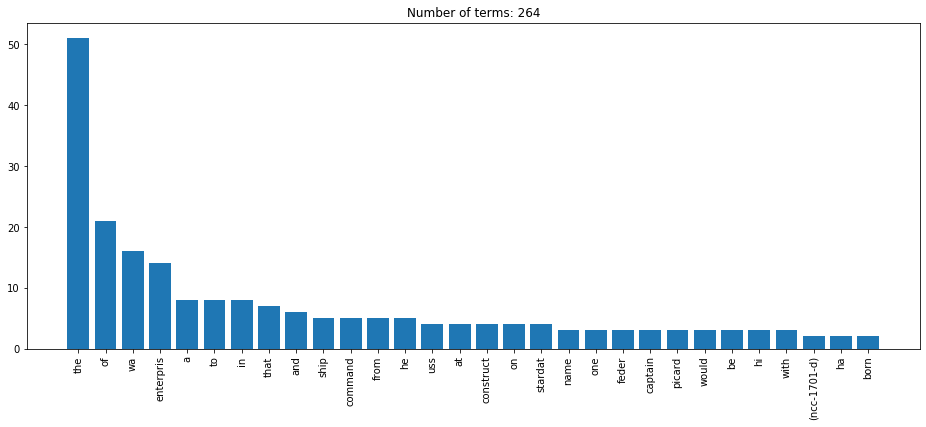

In [56]:
plot_words(stemmed.split())

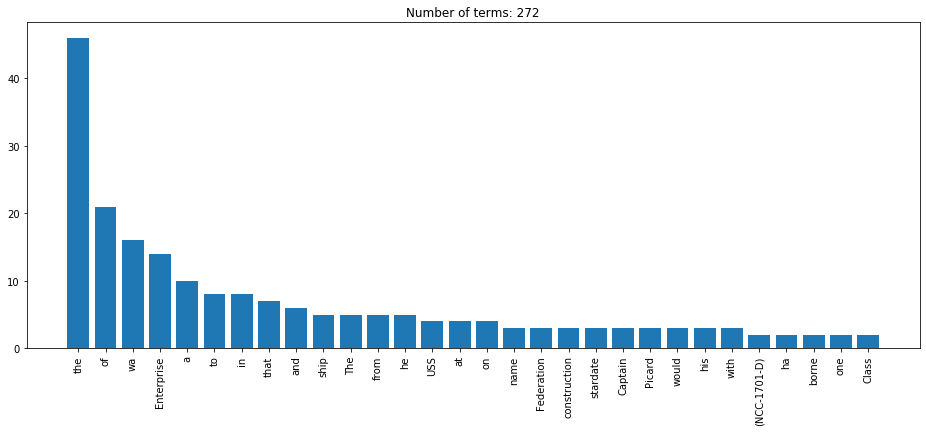

In [57]:
plot_words(lemma.split())

In [58]:
## spaCy
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, t.text, t.lemma_))
    if t.text == '.':
        break

i | Token        Lemma
--| ------------ ------------
 1| 'USS'        'USS'
 2| 'Enterprise' 'Enterprise'
 3| '('          '('
 4| 'NCC-1701-D' 'NCC-1701-D'
 5| ')'          ')'
 6| '\n\n'       '\n\n'
 7| '"'          '"'
 8| 'For'        'for'
 9| 'five'       'five'
10| 'hundred'    'hundred'
11| 'years'      'year'
12| ','          ','
13| 'every'      'every'
14| 'ship'       'ship'
15| 'that'       'that'
16| 'has'        'have'
17| 'borne'      'bear'
18| 'the'        'the'
19| 'name'       'name'
20| 'of'         'of'
21| 'the'        'the'
22| 'Enterprise' 'enterprise'
23| 'has'        'have'
24| 'become'     'become'
25| 'a'          'a'
26| 'legend'     'legend'
27| '.'          '.'


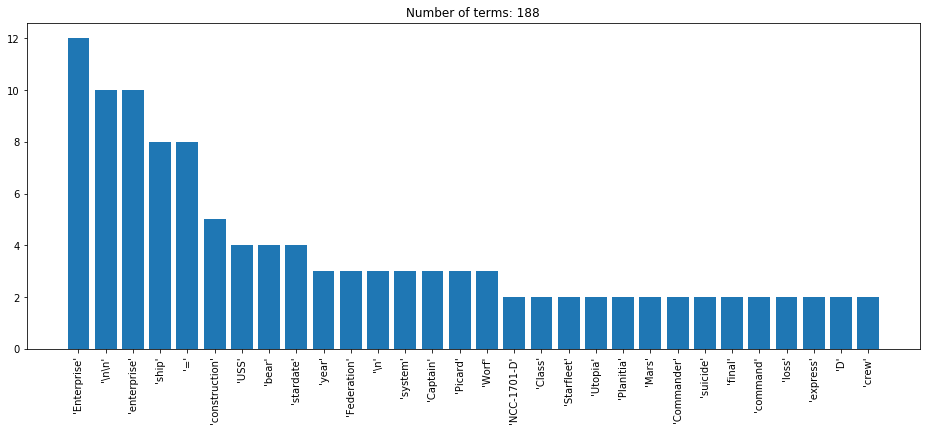

In [59]:
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)])

## Identify Entities

In [63]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/allenj/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/allenj/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [64]:
## nltk
entities = nltk.chunk.ne_chunk(tagged)

for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        print('%-12s: %s' % (t, n))

ORGANIZATION: USS Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Enterprise
PERSON      : United Federation
ORGANIZATION: Planets Galaxy
PERSON      : Starfleet
ORGANIZATION: Enterprise
ORGANIZATION: Federation
ORGANIZATION: Battle
GPE         : Veridian
ORGANIZATION: Utopia Planitia Fleet
PERSON      : Mars
ORGANIZATION: Solar
ORGANIZATION: Commander Orfil Quinteros
PERSON      : Brahms
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Pegasus
ORGANIZATION: Utopia Planitia
PERSON      : Walter Pierce
PERSON      : Marla Finn
PERSON      : William Hodges
PERSON      : Pierce
ORGANIZATION: Enterprise
PERSON      : Mars
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
FACILITY    : Earth Station McKinley
PERSON      : Captain Jean-Luc Picard
ORGANIZATION: Rear Admiral Norah Satie
ORGANIZATION: Commander Riker
ORGANIZATION: Enterprise
PERSON      : Picard
PERSON      : Deep Space
GPE         : Starfleet
PERSON      : Captain Benjamin Sisko
ORGANIZATION: Enterpris

In [65]:
## spaCy
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

 0: USS Enterprise (NCC-1701-D)"
--------------------------------------------------------------------------------
ORG        : USS Enterprise
 1: For five hundred years, every ship that has borne the name of the Enterprise has become a legend.
--------------------------------------------------------------------------------
DATE       : five hundred years
 2: This one is no different."
 3: The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise.
--------------------------------------------------------------------------------
PRODUCT    : The USS Enterprise
DATE       : a 24th century
ORG        : United Federation of Planets Galaxy Class
ORDINAL    : fifth
 4: During her career, the Enterprise served as the Federation flagship.
--------------------------------------------------------------------------------
ORG        : Federation
 5: The Enterprise was destroye

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



